In [18]:
import numpy as np
import pandas as pd
import numpy.random as nr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [19]:
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130710_timesequence_fin_exist', 'r') as f1: 
  f1=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130710_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130711_timesequence_fin_exist', 'r') as f2: 
  f2=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130711_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130712_timesequence_fin_exist', 'r') as f3: 
  f3=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130712_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130713_timesequence_fin_exist', 'r') as f4: 
  f4=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130713_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130714_timesequence_fin_exist', 'r') as f5: 
  f5=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130714_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130715_timesequence_fin_exist', 'r') as f6: 
  f6=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130715_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130716_timesequence_fin_exist', 'r') as f7: 
  f7=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130716_timesequence_fin_exist', 'r')

flist=[f1,f2,f3,f4,f5,f6,f7]
deptime = []  # 8(9) 출발시간
deploc = {} # 9(10) 출발장소
deploc2= [] # 출발장소 리스트형

arrtime = []  # 10(11) 도착시간
arrloc = {} #11(12) 도착장소
arrloc2=[] # 도착장소 리스트형

mostplace={}
spendtime={}
avestdtime={}
mostinfo={}

함수
-----------------------

In [20]:
#함수

def caltime(x):
  ye=x//10**10
  mo=(x//10**8)%100
  da=(x//10**6)%100
  ho=(x%10**6)//10**4
  mi=(x%10**4)//100
  se=(x%100)

  scalesec=ho * 3600 + mi * 60 + se
  return [ye,mo,da,ho,mi,se,scalesec]

def caltimeback(x):
  bho = x // 3600
  bmi = x % 3600 // 60
  bse = x % 60
  return [bho,bmi,bse]

Main Part
---------------

In [21]:
statime={}
mintime={}
for j in range(1): #len(flist)
  tryf=flist[j]
  while True:    # 파일의 줄을 읽어서 한 줄을 하나의 문자열로 저장함(리스트형식으로)
    line=tryf.readline()
    if not line: 
      print('끝')
      break
    line=line.split(',')
    #n=list(filter(None,n))

    #시간계산
    nstat=int(line[8]) #[ye,mo,da,ho,mi,se,scalesec]
    ndest=int(line[10])
    nstat=caltime(nstat)
    ndest=caltime(ndest) 

    taketime=ndest[6]-nstat[6] # 걸린시간 
    #if taketime>0 and line[9]=='0202' and line[11]=='0241':
    if taketime>0 and line[11]=='0234' and line[7]=='01':
      str1=nstat[6] #출발역+도착역으로 key값 저장
      #print("원시간",line[8], "바꾼시간",nstat)
      try:
        spendtime[str1].append(taketime) # value를 리스트로 지정하면 거기에 리스트함수 적용가능
      except:
        spendtime[str1] = [taketime]

          # 도착, 출발
      try:
        mostplace[str1] += 1
      except:
        mostplace[str1] = 1
      ttime= nstat[3]*3600 + nstat[4]*60
      try:
        mintime[ttime] += 1
      except:
        mintime[ttime]  = 1

끝


In [22]:
avekey=list(spendtime.keys())
for i in range(0, len(list(spendtime.keys()))):
  str1=avekey[i]
  aven=np.mean(spendtime[str1])
  stdn=np.std(spendtime[str1])
  manytimes=mostplace[str1]
  mostinfo[str1] = [manytimes,aven,stdn]
t=[]
#dic를 items()를 활용해서 튜플로 바꿔준 다음에 정렬하기.
#print("가장많이 이용한 구간 랭킹=",sorted(mostplace.items(), key= lambda x: x[1], reverse= True))
ranking1=sorted(mostinfo.items(), key= lambda x: x[1], reverse= True)

In [23]:
for i in range(10):
  print(i+1,'순위:',"구간",ranking1[i])
print("구간별 평균시간과 표준편차 랭킹")
for i in range(3):
  str0=ranking1[i][0]
  print(spendtime[str0])

1 순위: 구간 (66469, [9, 1540.0, 560.0178568581541])
2 순위: 구간 (65696, [8, 1872.5, 809.4073449135485])
3 순위: 구간 (65568, [8, 1656.75, 575.6005016502331])
4 순위: 구간 (65892, [8, 1632.875, 736.6694369763144])
5 순위: 구간 (65469, [8, 1596.5, 493.27983944207574])
6 순위: 구간 (65673, [8, 1547.625, 593.7457236688109])
7 순위: 구간 (66270, [8, 1492.5, 428.3214330383199])
8 순위: 구간 (69645, [8, 1410.25, 531.419031932429])
9 순위: 구간 (29271, [8, 1367.75, 424.02262616516117])
10 순위: 구간 (66384, [8, 1121.875, 564.0289082795314])
구간별 평균시간과 표준편차 랭킹
[1554, 404, 2098, 1962, 1543, 1805, 2299, 1145, 1050]
[2414, 1106, 1830, 3078, 447, 1319, 2281, 2505]
[1856, 2266, 1891, 1095, 2658, 1432, 915, 1141]


그래프 그리기
--------------

In [24]:
plt.figure(figsize=(40,10))
keylist2=list(mintime.keys())
print(mintime)
rank_num=sorted(mintime.items(), key= lambda x: x[1], reverse= True)
mintime2=sorted(mintime.items(), key= lambda x: x[0], reverse= False)
ylist=[]
'''
for i in range(len(mintime2)):
  index=mintime2[i]
  ylist.append(mintime2[index])
plt.scatter(keylist2, ylist,c='g',s=1)
'''
xlist2=[]
ylist2=[]
for i in range(len(mintime2)):
  if mintime2[i][0]>15000:
    xlist2.append(mintime2[i][0])
    ylist2.append(mintime2[i][1])

print(rank_num)
print(mintime2)

{72000: 52, 28260: 75, 33900: 38, 29100: 94, 35700: 29, 27420: 89, 62760: 54, 43680: 33, 77700: 60, 69180: 121, 45240: 29, 67740: 135, 52080: 35, 60060: 34, 23700: 15, 41100: 26, 61380: 45, 63540: 66, 72420: 76, 21600: 15, 85380: 6, 33600: 40, 66780: 128, 80100: 67, 59160: 32, 41040: 29, 40860: 29, 66480: 146, 26760: 68, 66960: 134, 35040: 29, 68340: 98, 34440: 41, 58260: 50, 54720: 39, 84420: 17, 21720: 21, 28620: 88, 46620: 35, 39900: 20, 28980: 95, 58500: 42, 26640: 70, 64020: 76, 48900: 42, 29340: 104, 70680: 49, 25680: 47, 31800: 61, 32400: 47, 67020: 139, 27000: 86, 35460: 39, 30780: 82, 53400: 26, 24000: 16, 58680: 42, 48180: 36, 28380: 90, 65760: 168, 49020: 38, 79920: 69, 75120: 39, 63000: 64, 71100: 62, 67920: 98, 36900: 36, 69480: 96, 80280: 60, 77520: 62, 33540: 39, 73920: 60, 55920: 36, 66540: 154, 24960: 38, 27900: 83, 56700: 33, 80880: 57, 37920: 26, 38100: 32, 53460: 40, 49200: 28, 64320: 91, 61920: 63, 58620: 35, 78240: 51, 70320: 73, 70020: 86, 55860: 47, 73320: 70, 2

<Figure size 2880x720 with 0 Axes>

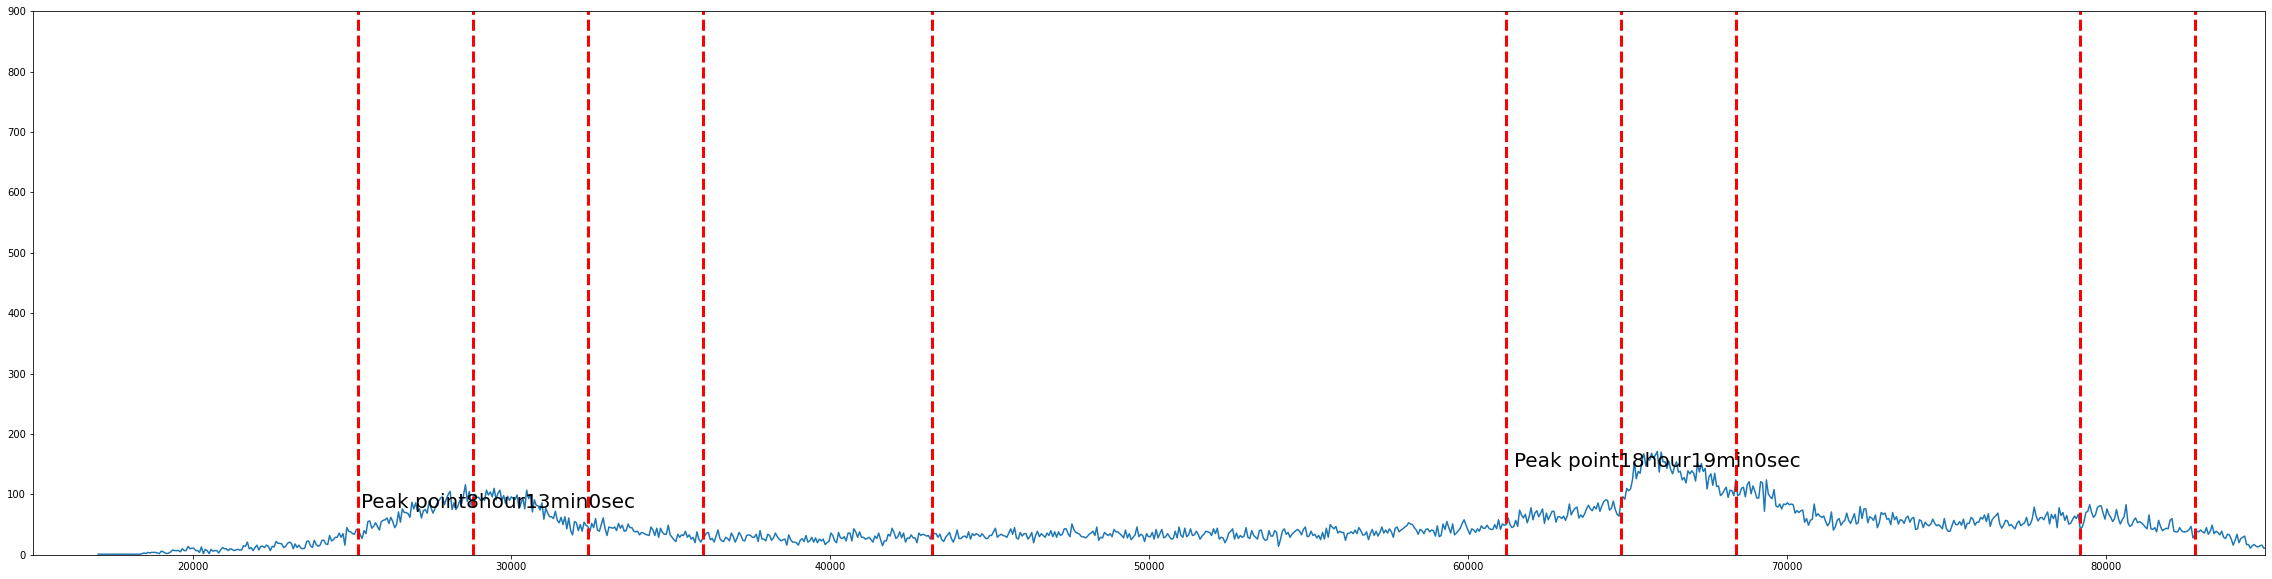

In [26]:
plt.figure(figsize=(40,10))
plt.xlim([15000, 85000]) 
plt.ylim([0, 900])
plt.plot(xlist2,ylist2)
#peak
#plt.hlines(rank_num[0][1], 15000, rank_num[0][0], colors='g', linewidth=1)
#plt.vlines(rank_num[0][0], 0, rank_num[0][1], colors='g', linewidth=1)
p1i=72
ppint1= caltimeback(rank_num[p1i][0])
plt.text(rank_num[p1i][0],rank_num[p1i][1],
         'Peak point' + str(ppint1[0]) + 'hour' + str(ppint1[1]) + 'min' + str(ppint1[2]) +'sec' ,
         fontsize = 20,
         color='k',
         horizontalalignment='center',
         verticalalignment='top')
#plt.hlines(rank_num[2][1], 15000, rank_num[2][0], colors='g', linewidth=1)
#plt.vlines(rank_num[2][0], 0, rank_num[2][1], colors='g', linewidth=1)
p2i=0
ppint2= caltimeback(rank_num[p2i][0])
plt.text(rank_num[p2i][0],rank_num[p2i][1],
         'Peak point' + str(ppint2[0]) + 'hour' + str(ppint2[1]) + 'min' + str(ppint2[2]) +'sec',
         fontsize = 20,
         color='k',
         horizontalalignment='center',
         verticalalignment='top')
'''
ppint3= caltimeback(rank_num[119][0])
plt.text(rank_num[119][0],rank_num[119][1],
         'Peak point' + str(ppint3[0]) + 'hour' + str(ppint3[1]) + 'min' + str(ppint3[2]) +'sec',
         fontsize = 20,
         color='k',
         horizontalalignment='center',
         verticalalignment='top')
'''
'''
#기울기 변화
fdx1 = 25200 ; fdy1 = 68
fdx2 = rank_num[0][0] ; fdy2 = rank_num[0][1]
fdx3 = 36000 ; fdy3 = 136
print('기울기1:', (fdy2-fdy1) / (fdx2-fdx1) )
print('기울기2:', (fdy3-fdy2) / (fdx3-fdx2))
plt.plot([fdx1,fdx2],[fdy1,fdy2], c= 'k' , linewidth=2)
plt.plot([fdx2,fdx3],[fdy2,fdy3], c= 'k' , linewidth=2)

fdx12 = 64800 ; fdy12 = 149
fdx22 = rank_num[p2i][0] ; fdy22 = rank_num[p2i][1]
fdx32 = 68400 ; fdy32 = 121
print('기울기1:', (fdy22-fdy12) / (fdx22-fdx12) )
print('기울기2:', (fdy32-fdy22) / (fdx32-fdx22))
plt.plot([fdx12,fdx22],[fdy12,fdy22], c= 'k' , linewidth=2)
plt.plot([fdx22,fdx32],[fdy22,fdy32], c= 'k' , linewidth=2)
'''


plt.axvline(25200, color='r', linestyle='--', linewidth=3, label='7시')
plt.axvline(28800, color='r', linestyle='--', linewidth=3, label='8시')
plt.axvline(32400, color='r', linestyle='--', linewidth=3, label='9시')
plt.axvline(36000, color='r', linestyle='--', linewidth=3, label='10시')
plt.axvline(43200, color='r', linestyle='--', linewidth=3, label='12시')
plt.axvline(61200, color='r', linestyle='--', linewidth=3, label='17시')
plt.axvline(64800, color='r', linestyle='--', linewidth=3, label='18시')
plt.axvline(68400, color='r', linestyle='--', linewidth=3, label='19시')
plt.axvline(79200, color='r', linestyle='--', linewidth=3, label='22시')
plt.axvline(82800, color='r', linestyle='--', linewidth=3, label='23시')

In [27]:
indicate=0
plt.figure(figsize=(20,10))
num=len(spendtime)
keylist=list(spendtime.keys())
'''
for i in range(num):
  if sum(spendtime[keylist[i]])>4000:
    print(i)
    #spendtime[i]=ranking1[rank][1][1]
    print(spendtime[keylist[i]])
'''
xlist=[]
ylist=[]
ra = 15000
rb = 80000
print(rb - ra, 720)
for i in range(num):
  x=int(keylist[i])
  y=spendtime[keylist[i]]
  y=np.mean(y)
  if (y < 4500 and  x >ra and  x< rb):
    xlist.append(x)
    ylist.append(y)
#plt.errorbar(ranking1[0][1][1], [0,9] , yerr=0 , c='r', capsize=30) # 실제 평균값에서 에러바

65000 720


<Figure size 1440x720 with 0 Axes>

In [ ]:
interval = []

31263 31263


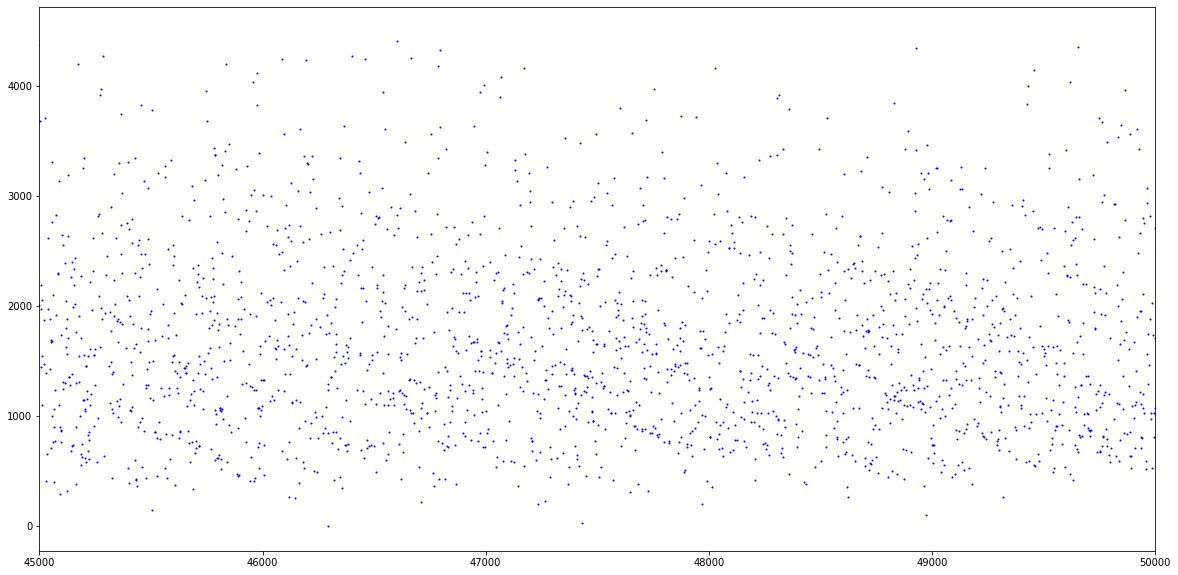

In [28]:
plt.figure(figsize=(20,10))
plt.xlim([45000,50000])
print(len(xlist), len(ylist))
plt.scatter(xlist,ylist,c='b',s=1)

In [ ]:
'''
rank=0
index=str(ranking1[rank][0]) #1순위 구간이름 문자열로 변환
times=sorted(times.items(), key= lambda x: x[1], reverse= True)
print(times)

insider=0
outsider=0
mean=ranking1[0][1][1]
std=ranking1[0][1][2]
for i in range(len(times)):
  if times[i][0]>=mean+std:
    outsider+=times[i][1]
  else:
    insider+=times[i][1]
print("평균+표준편차보다 더 늦게 온 사람")
print(outsider, insider)
print((outsider/(insider+outsider))*100)

insider=0
outsider=0
for i in range(len(times)):
  if times[i][0]>=mean:
    outsider+=times[i][1]
  else:
    insider+=times[i][1]
print("평균보다 더 늦게 온 사람")
print(outsider, insider)
print((outsider/(insider+outsider))*100)
'''

마무리
------------------

In [ ]:
for i in range(len(flist)):
  tryf=flist[i]
  tryf.close()